# Лабораторная работа: кластеризация

## Пономарева Алиса Юрьевна, ИАД-2

## Разделение изображения на семантические компоненты

Загрузите изображение

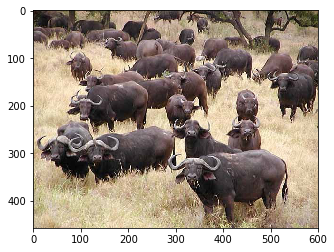

In [48]:
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

img1 = imread('1.jpg')
fig = plt.figure()
plt.imshow(img1)

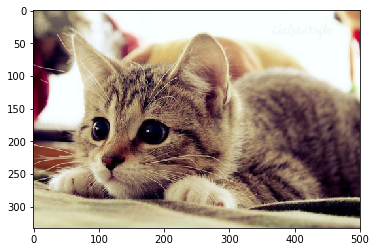

In [49]:
img2 = imread('2.jpg')
fig = plt.figure()
plt.imshow(img2)

**1. (1 балл)** На каждом изображении, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель следующим образом [$\lambda x_i,\lambda y_i,r_i,g_i,b_i$], где $x_i$ и $y_i$ — координаты пикселя, $r_i$,$g_i$,$b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.
 
**2. (0.5 балл)** Визуализируйте результаты сегментации.

In [50]:
from sklearn.cluster import KMeans

In [58]:
lyambda = 0.2
n_clusters = 4

In [59]:
#make an array of features - [l*x_i, l*y_i, r_i, g_i, b_i]
def feats_arr(img, lyambda = lyambda):
    X = np.zeros((img.shape[0]*img.shape[1], 5))
    img_ = img.reshape(img.shape[0]*img.shape[1], 3)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            X[i*img.shape[1]+j] = np.hstack((lyambda*i,lyambda*j,img_[i*img.shape[1]+j]))
    return X

In [60]:
#сегментация
def img_seg(img, n = n_clusters, lyambda = lyambda):
    X = feats_arr(img,lyambda)
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    return cluster_labels.reshape(img.shape[0],img.shape[1])

In [61]:
#визуализация
def show_seg(img, n = n_clusters, lyambda = lyambda):
    img_s = img_seg(img,n,lyambda)
    
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1,3,1)
    plt.axis("off")
    plt.title('original')
    plt.imshow(img)
    
    plt.subplot(1,3,2)
    plt.axis("off")
    plt.title('Clusters, lambda = ' + str(lyambda) + ', n_clusters = ' + str(n))
    plt.imshow(img_s)
    
    plt.subplot(1,3,3)
    plt.axis("off")
    plt.title('Contour, lambda = ' + str(lyambda) + ', n_clusters = ' + str(n))
    leng = len(np.unique(img_s))
    plt.imshow(img)
    for i in range(leng):
        plt.contour(img_s == i, colors=[plt.cm.spectral(i / float(leng))])
    plt.show()

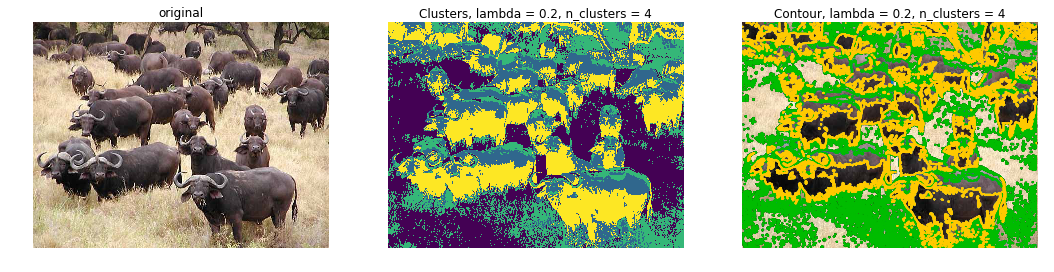

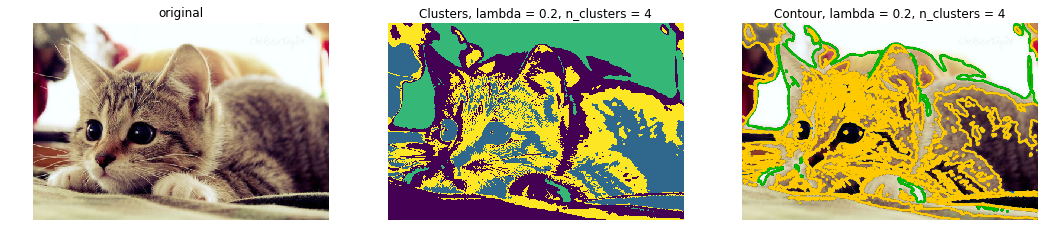

In [62]:
show_seg(img1)
show_seg(img2)

**3. (1 балл)** 
Выделите сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету.
 
**4. (0.5 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше).

In [63]:
#серый
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989*r+0.5870*g+0.1140*b
    return gray

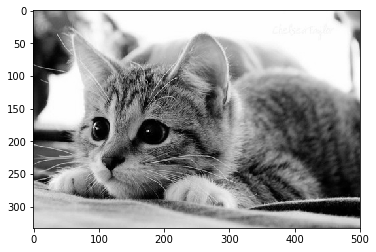

In [64]:
plt.imshow(rgb2gray(img2),cmap="gray")

In [65]:
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

#код из примера 
[пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).

In [66]:
gray1 = rgb2gray(img1[:img1.shape[0]//4*4,:img1.shape[1]//4*4])
gray1 = (gray1[::2, ::2] + gray1[1::2, ::2] + gray1[::2, 1::2] + gray1[1::2, 1::2])/4
gray1 = (gray1[::2, ::2] + gray1[1::2, ::2] + gray1[::2, 1::2] + gray1[1::2, 1::2])/4

gray2 = rgb2gray(img2[:img2.shape[0]//4*4,:img2.shape[1]//4*4])
gray2 = (gray2[::2, ::2] + gray2[1::2, ::2] + gray2[::2, 1::2] + gray2[1::2, 1::2])/4
gray2 = (gray2[::2, ::2] + gray2[1::2, ::2] + gray2[::2, 1::2] + gray2[1::2, 1::2])/4

# Convert the image into a graph1 with the value of the gradient on the edges.
graph1 = image.img_to_graph(gray1)
graph2 = image.img_to_graph(gray2)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the actual image.
# For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph1.data = np.exp(-beta * graph1.data / gray1.std()) + eps
graph2.data = np.exp(-beta * graph2.data / gray2.std()) + eps

In [136]:
def show_spectral(img, graph, n = n_clusters):
    plt.figure(figsize=(18, 6))
    k = 1
    
    for assign_labels in ('kmeans', 'discretize'):
        labels = spectral_clustering(graph, n_clusters=n,
                                     assign_labels=assign_labels,
                                     random_state=3274)
        labels = labels.reshape(img.shape)
        
        plt.subplot(1,2,k)
        plt.imshow(img,   cmap=plt.cm.gray)
        for l in range(n):
            plt.contour(labels == l, contours=1,
                        colors=[plt.cm.spectral(l / float(n))])
        plt.xticks(())
        plt.yticks(())
        plt.title('Spectral clustering: %s' % (assign_labels))
        
        k = k + 1
    plt.show()

C:\Users\AliceP\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


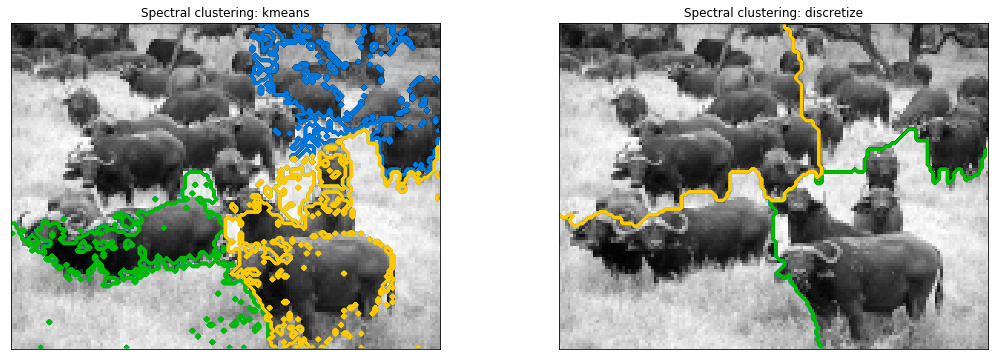

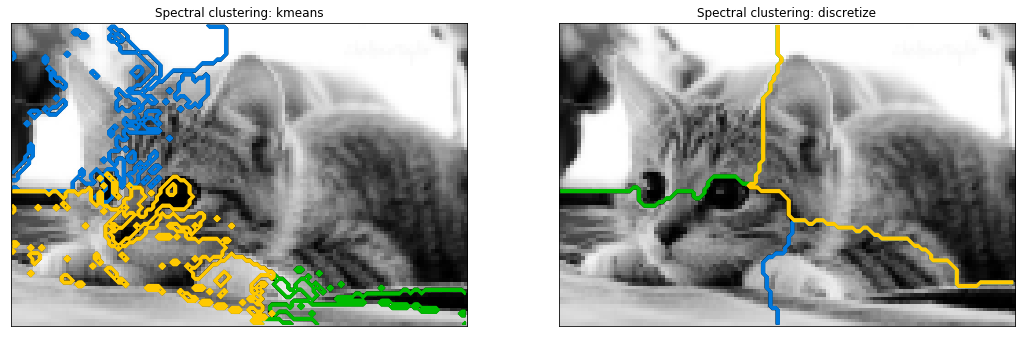

In [68]:
show_spectral(gray1,graph1)
show_spectral(gray2,graph2)

**5. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два метода сегментации.

**6. (0.5 балл)**
Насколько хорошо выделяются объекты на изображениях?

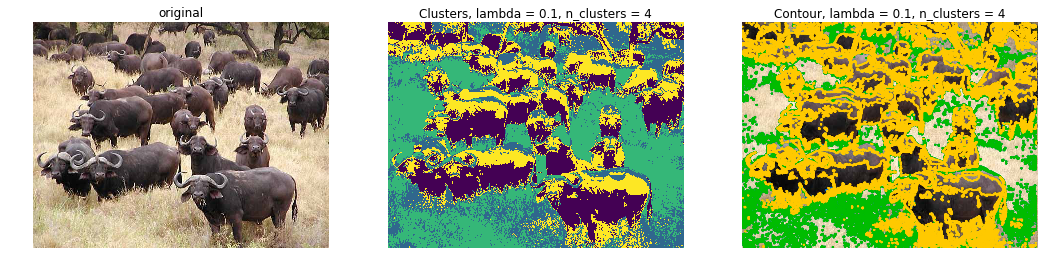

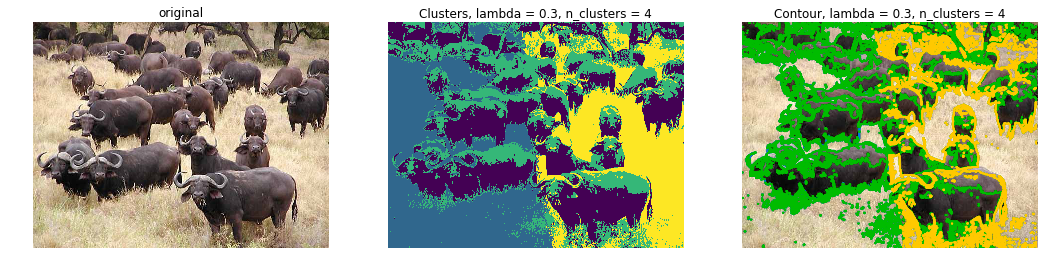

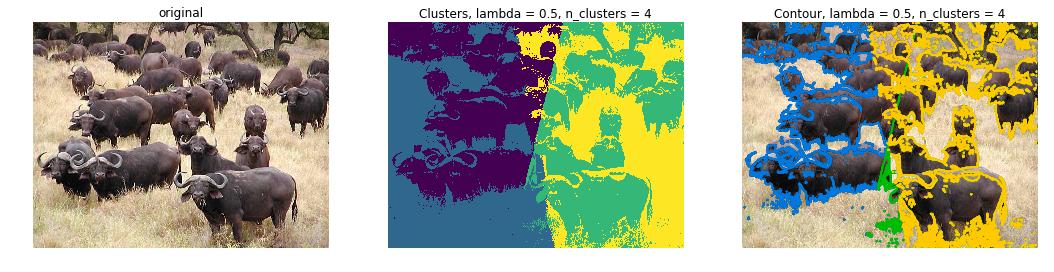

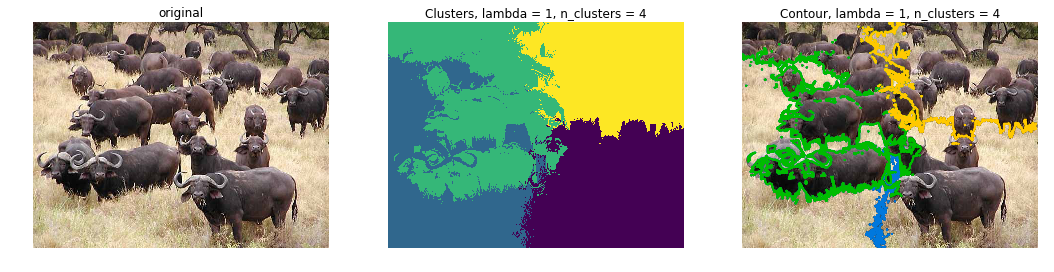

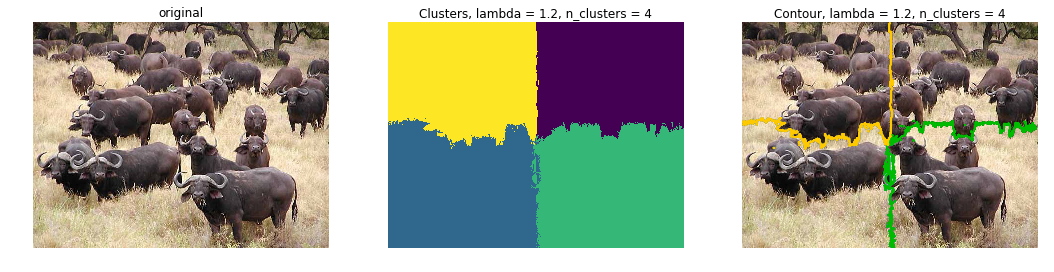

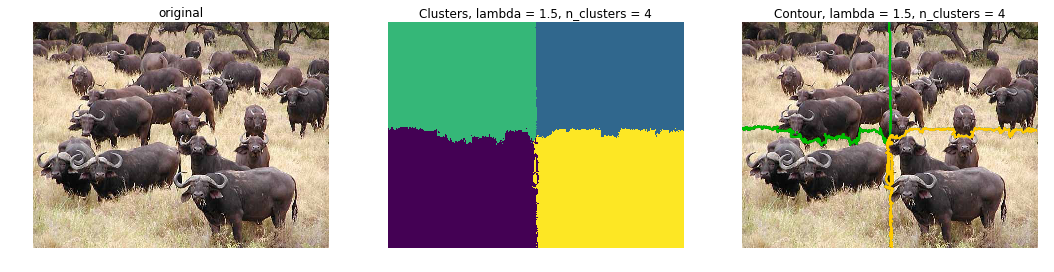

In [71]:
l = [0.1, 0.3, 0.5, 1, 1.2, 1.5]
for i in range (len(l)):
    show_seg(img1, lyambda=l[i])

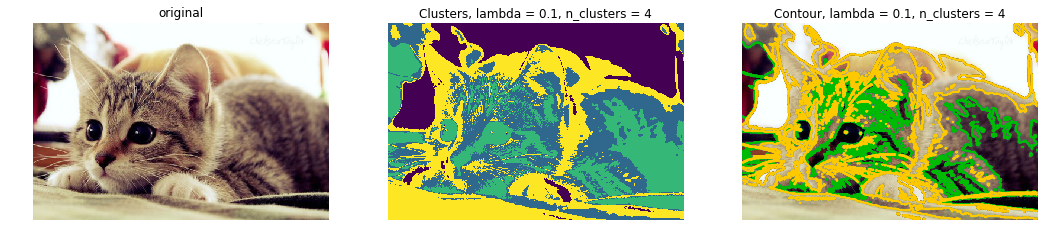

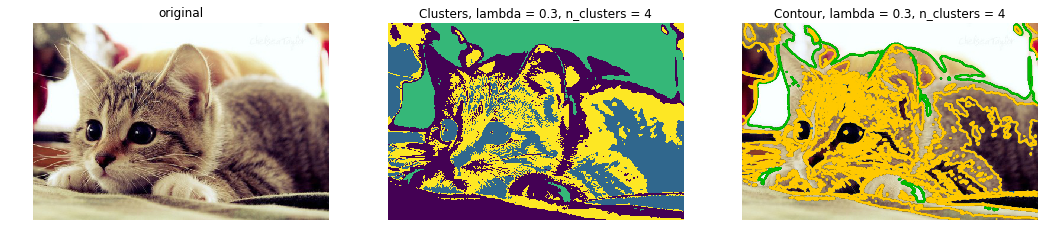

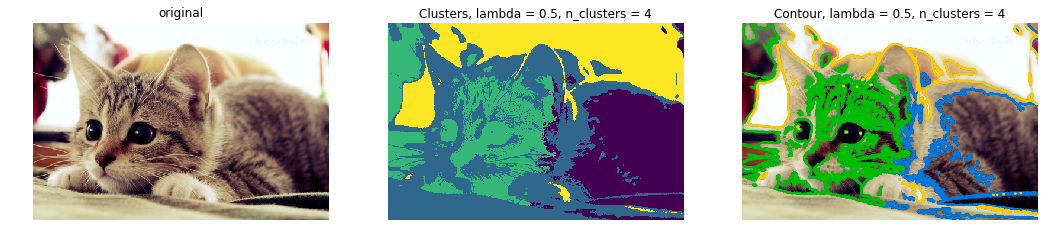

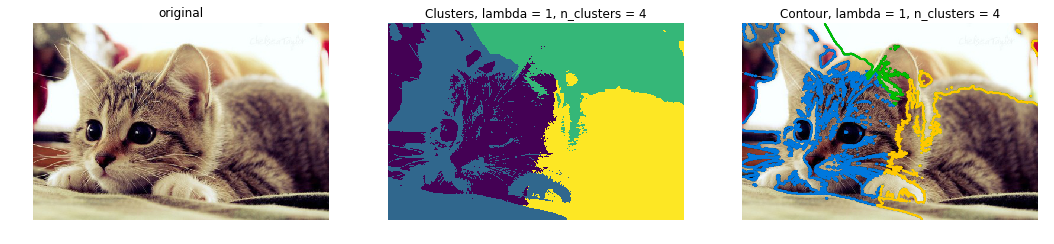

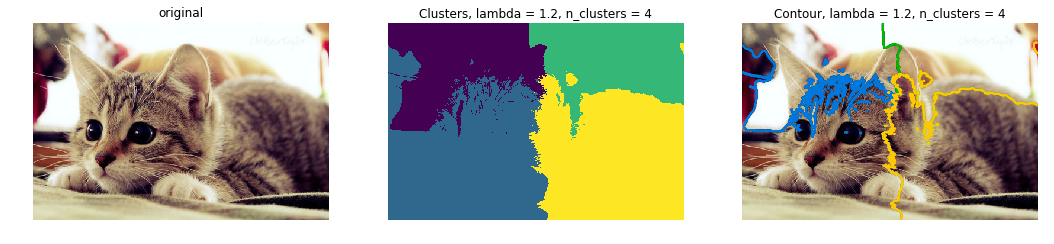

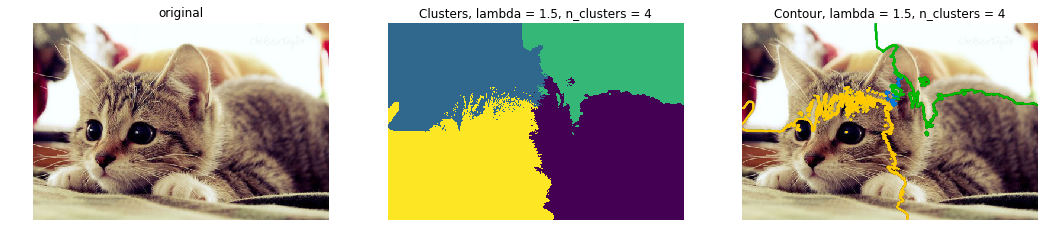

In [72]:
for i in range (len(l)):
    show_seg(img2, lyambda=l[i])

**Вывод:** при больших лямбда - слишком плохая кластеризация, при малых лямбда тоже не очень хорошо, хорошо выделяются объекты при лямбда = 0.5.
Первый метод кажется лучше второго.

### Алгоритм спектральной кластеризации
[статья](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)

* определить матрицу сходства $A$, используя Гауссово ядрор $K$ ($A_{i,j}\sim exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $) или просто матрице смежности (например $A_{i,j}=\delta_{i,j}$),
* построить лапласиан по $A$, например $L=D-A$ - простой, $L_{N}=D^{-1/2}LD^{-1/2}$ - нормализованный, где $D_{i,i}=\sum^{n}_{j}a_{i,j}$ - диагональная матрица,
* свойство лапласиана - $x^{T}Lx=\frac{1}{2}\sum_{i,j=1}^{n}w_{i,j}\Vert x_{i}-x_{j}\Vert^{2}$,
* найти собственные значения $L v=\lambda v$   (или решить обобщенную задачу $L v=\lambda D v$ )
* выбрать $k$ собтвенных векторов $\{ v_{i}, i=1, k \}$, соответствующих $k$ наименьшим (или наибольшим) собственным значениям  $\{ \lambda_{i}, i=1, k \}$ , и задать $k$-мерное подпространство $P^{T}LP$,
* найти кластеры в этом подпространстве.

**7. (2 доп. балла)** Визуализируйте первые несколько собственных векторов, соответствующие самым маленьким собственным числам.
Для этого вам надо более детально ознакомиться с тем, как  работает алгоритм (см. [статью](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)).

Вам может помочь [исходный код sklearn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/spectral_embedding_.py#L133) и функции из scipy: eigh, eigsh, lobpcg.


## Сжатие информации с помощью SVD

Выберите любую из картинок.
Приведите ее к серому цвету.

Чёрно-белая картинка - матрица, элементы которой - насыщенность серого цвета каждого из пикселей.

**Замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.


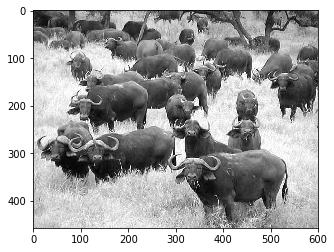

In [73]:
img = imread(r'1.jpg')[:,:,0]# матрица интенсивностей
plt.gray()
imgplot = plt.imshow(img)
plt.show()

**8. (1 балл)** Постройте сингулярное разложение этой матрицы (не центрируя данные). 

**9. (1 балл)** Визуализуйте первую главную компоненту. Что получилось? Почему?

**10. (0.5 балл)** Визуализуйте компоненты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Что получилось и почему?
Сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения?

**11. (0.5 балл)** Как изменится результат, если сначала вы центрируете данные?



In [128]:
from sklearn.decomposition import randomized_svd

In [129]:
u, sigma,v = randomized_svd(img, n_components=170)

In [130]:
def vis_comp(num1, num2):
    comp = np.matrix(u[:,num1:num2]) * np.diag(sigma[num1:num2]) * np.matrix(v[num1:num2, :])
    plt.imshow(comp, plt.cm.gray)
    plt.axis('off')
    if num2 == -1:
        plt.title('Main components ' + str(num1) + '-last')
    else:
        plt.title('Main components ' + str(num1) + ' - ' + str(num2))

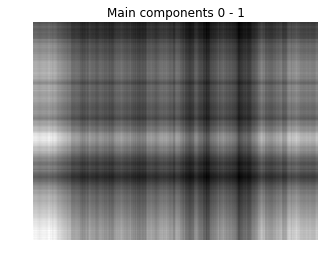

In [131]:
vis_comp(0,1)

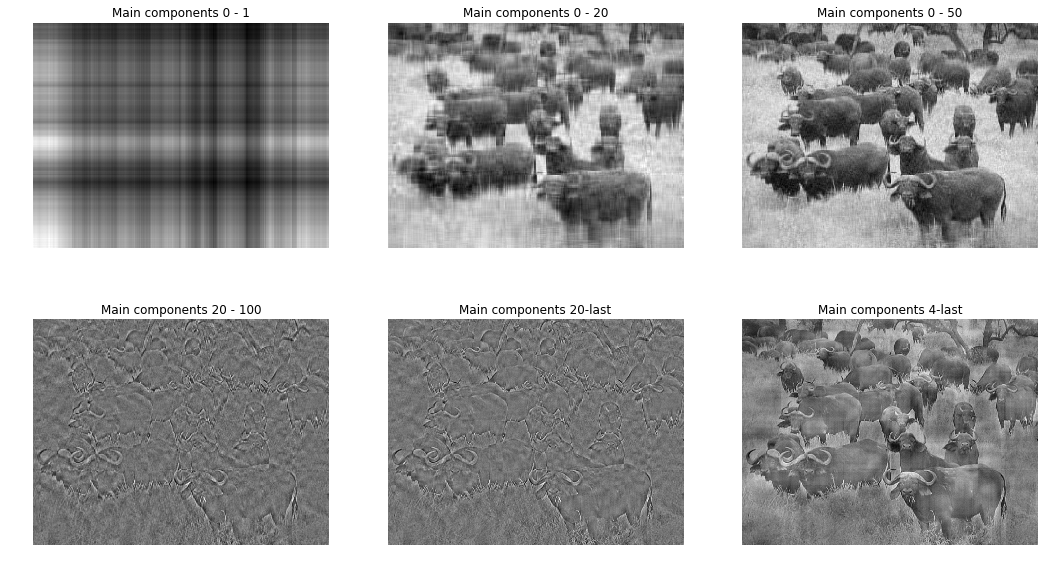

In [132]:
steps = [[0, 1], [0, 20], [0, 50], [20, 100],[20, -1], [4,-1]]
fig = plt.figure(figsize=(18,10))
for i in range(len(steps)):
    plt.subplot(2,3,i+1)
    vis_comp(num1=steps[i][0], num2=steps[i][1])
plt.show()

In [133]:
#центрируем
img_center = img - img.mean()

In [134]:
u, sigma, v = randomized_svd(img_center, n_components=125)

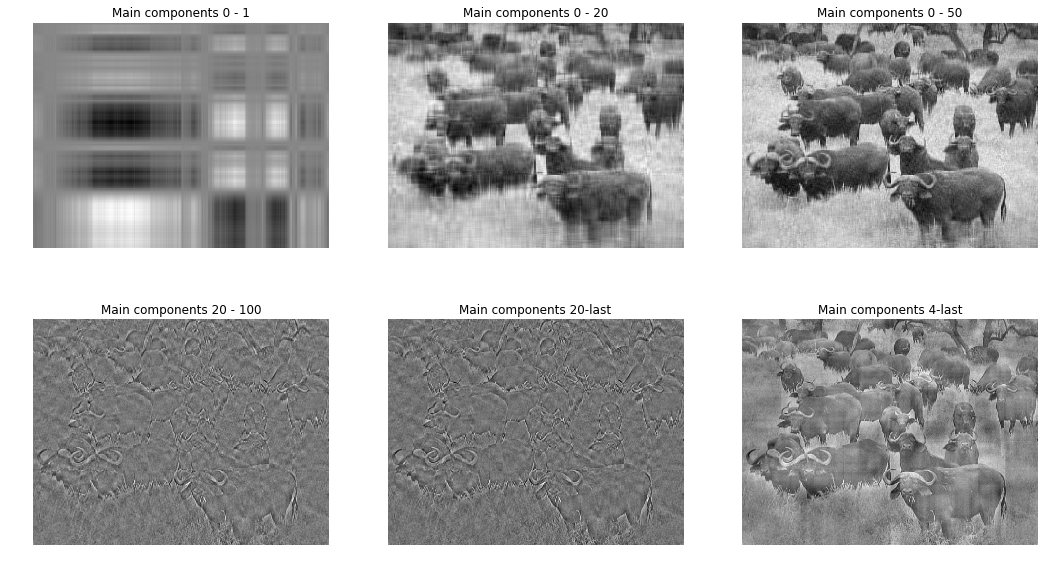

In [135]:
steps = [[0, 1], [0, 20], [0, 50], [20, 100], [20, -1], [4,-1]]
fig = plt.figure(figsize=(18,10))
for i in range(len(steps)):
    plt.subplot(2,3,i+1)
    vis_comp(num1=steps[i][0], num2=steps[i][1])
plt.show()

**11** Если сначала центрировать данные, поменялась первая компонента